# SALARYDATA  DATASET
Using the above dataset to build a Naive Bayes Model to predict the salary of the employees. 

## BUSINESS OBJECTIVE
* Maximize Accurate prediction
* Minimize Fake Ads 
* Identify False Claims

## CONSTRAINTS
* Authenticating information


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                              | **Type** | **Relevance** |
|:--------:|:--------------------|:-------------------------------------------------------------|:--------:|:-------------:|
| 1        | age                 | Age of the employee                                          | Count    | Relevant      |
| 2        | workclass           | Working class of the employee                                | Nominal  | Relevant      |
| 3        | education           | Education of the employee                                    | Nominal  | Irrelevant    |
| 4        | educationno         | Education No of the employee                                 | Ordinal  | Relevant      |
| 5        | maritalstatus       | Marital status of the employee                               | Nominal  | Relevant      |
| 6        | occupation          | Occupation of the employee                                   | Nominal  | Relevant      |
| 7        | relationship        | Relation status of the employee                              | Nominal  | Relevant      |
| 8        | race                | Race of the employee                                         | Nominal  | Relevant      |
| 9        | sex                 | Sex of the employee                                          | Binary   | Relevant      |
| 10       | capitalgain         | Capital gain on investments                                  | Ratio    | Relevant      |
| 11       | capitalloss         | Capital loss on investments                                  | Ratio    | Relevant      |
| 12       | hoursperweek        | Working hours per week                                       | Ratio    | Relevant      |
| 13       | native              | Native Country of the employee                               | Nominal  | Relevant      |
| 14       | Salary              | Dependent Variable: greater than 50k or less than 50k Salary | Binary   | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df_train = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass14\SalaryData_Train.csv")
df_test= pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass14\SalaryData_Test.csv")
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [4]:
print(colored('Shape of Train dataset: ','blue',attrs=['bold']),df_train.shape)
print(colored('Shape of Test dataset: ','blue',attrs=['bold']),df_test.shape)

Shape of Train dataset:  (30161, 14)
Shape of Test dataset:  (15060, 14)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [7]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


Checking the Number of Duplicates in the Dataset.

In [9]:
duplicate_values_train=df_train.duplicated(subset=None,keep='first').sum()
duplicate_values_test=df_test.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values in train dataset : ','blue',attrs=['bold']),duplicate_values_train)
print(colored(' Number of Duplicate values in test dataset : ','blue',attrs=['bold']),duplicate_values_test)

 Number of Duplicate values in train dataset :  3258
 Number of Duplicate values in test dataset :  930


As there are duplicates in the train and test datset removing them using drop_duplicates function. 

In [10]:
df_train.drop_duplicates(keep='first',inplace=True)
df_test.drop_duplicates(keep='first',inplace=True)

Checking the Number and Percentage of Missing Values in the Dataset.

In [11]:
missing_train=df_train.isna().sum().sort_values(ascending=False)
missing_test=df_test.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values in the train dataset\n\n",'blue',attrs=['bold']),missing_train)
print(colored("Number of Missing Values in the test dataset\n\n",'blue',attrs=['bold']),missing_test)


Number of Missing Values in the train dataset

 age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64
Number of Missing Values in the test dataset

 age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


From the above it is clear that there are no missing values in the dataset

In [12]:
print(colored('Number of Unique Values in the train dataset:\n\n','blue',attrs=['bold']),df_train.nunique())
print(colored('Number of Unique Values in the test dataset:\n\n','blue',attrs=['bold']),df_test.nunique())

Number of Unique Values in the train dataset:

 age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64
Number of Unique Values in the test dataset:

 age               73
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      110
capitalloss       79
hoursperweek      89
native            40
Salary             2
dtype: int64


Checking the value counts for all the categorical columns in the dataset for both train and test dataset. 

In [13]:
cat_cols=[i for i in df_train.columns if df_train[i].dtype=='O']
print(colored('The value counts for each variable in the train dataset :\n\n','blue',attrs=['bold']))
for i in cat_cols:
    
    print(df_train[i].value_counts())
    

The value counts for each variable in the train dataset :


 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64
 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291


In [14]:
print(colored("The value counts for each variable in the test dataset : \n\n",'blue',attrs=['bold']))
for i in cat_cols:
    print(df_test[i].value_counts())

The value counts for each variable in the test dataset : 


 Private             10138
 Self-emp-not-inc     1279
 Local-gov            1017
 State-gov             664
 Self-emp-inc          565
 Federal-gov           460
 Without-pay             7
Name: workclass, dtype: int64
 HS-grad         4473
 Some-college    3014
 Bachelors       2369
 Masters          864
 Assoc-voc        634
 11th             542
 Assoc-acdm       493
 10th             395
 7th-8th          265
 Prof-school      241
 9th              219
 12th             194
 Doctorate        168
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
 Married-civ-spouse       6490
 Never-married            4501
 Divorced                 2026
 Separated                 470
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
 Prof-specialty       1899
 Exec-managerial      1897
 Craft-repair         1729
 Sales 

Dropping the education column as it is being covered by educationno column. 

In [15]:
df_train=df_train.drop(['education'],axis=1)
df_test=df_test.drop(['education'],axis=1)

### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [16]:
num_cols=[i for i in df_train.columns if df_train[i].dtype=='int64']
num_cols

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [17]:
print(colored('Mean Value : \n\n','blue',attrs=['bold']),df_train[num_cols].mean())
print(colored('Mean Value : \n\n','blue',attrs=['bold']),df_test[num_cols].mean())

Mean Value : 

 age               39.049140
educationno       10.144296
capitalgain     1215.443259
capitalloss       98.427499
hoursperweek      41.164591
dtype: float64
Mean Value : 

 age               39.155414
educationno       10.120736
capitalgain     1185.899292
capitalloss       94.499646
hoursperweek      41.073885
dtype: float64


In [18]:
print(colored('Median Value : \n\n','blue',attrs=['bold']),df_train[num_cols].median())
print(colored('Median Value : \n\n','blue',attrs=['bold']),df_test[num_cols].median())

Median Value : 

 age             38.0
educationno     10.0
capitalgain      0.0
capitalloss      0.0
hoursperweek    40.0
dtype: float64
Median Value : 

 age             38.0
educationno     10.0
capitalgain      0.0
capitalloss      0.0
hoursperweek    40.0
dtype: float64


In [19]:
print(colored('Mode Value : \n\n','blue',attrs=['bold']),stats.mode(df_train[num_cols],keepdims=True))
print(colored('Mode Value : \n\n','blue',attrs=['bold']),stats.mode(df_test[num_cols],keepdims=True))

Mode Value : 

 ModeResult(mode=array([[31,  9,  0,  0, 40]], dtype=int64), count=array([[  769,  8268, 24379, 25485, 11858]]))
Mode Value : 

 ModeResult(mode=array([[33,  9,  0,  0, 40]], dtype=int64), count=array([[  417,  4473, 12881, 13420,  6417]]))


### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [20]:
print(colored('Variance Value : \n\n','blue',attrs=['bold']),df_train[num_cols].var())
print(colored('Variance Value : \n\n','blue',attrs=['bold']),df_test[num_cols].var())

Variance Value : 

 age             1.739451e+02
educationno     6.865209e+00
capitalgain     6.092374e+07
capitalloss     1.810445e+05
hoursperweek    1.524497e+02
dtype: float64
Variance Value : 

 age             1.803527e+02
educationno     6.773305e+00
capitalgain     6.246044e+07
capitalloss     1.746870e+05
hoursperweek    1.505047e+02
dtype: float64


In [21]:
print(colored('Standard Deviation Value : \n\n','blue',attrs=['bold']),df_train[num_cols].std())
print(colored('Standard Deviation Value : \n\n','blue',attrs=['bold']),df_test[num_cols].std())

Standard Deviation Value : 

 age               13.188825
educationno        2.620154
capitalgain     7805.366384
capitalloss      425.493211
hoursperweek      12.347051
dtype: float64
Standard Deviation Value : 

 age               13.429544
educationno        2.602557
capitalgain     7903.191981
capitalloss      417.955786
hoursperweek      12.268036
dtype: float64


In [22]:
Range_train=df_train[num_cols].max()-df_train[num_cols].min()
Range_test=df_test[num_cols].max()-df_test[num_cols].min()
print(colored('The range of the train dataset: \n\n','blue',attrs=['bold']),Range_train)
print(colored('The range of the test dataset: \n\n','blue',attrs=['bold']),Range_test)

The range of the train dataset: 

 age                73
educationno        15
capitalgain     99999
capitalloss      4356
hoursperweek       98
dtype: int64
The range of the test dataset: 

 age                73
educationno        15
capitalgain     99999
capitalloss      3770
hoursperweek       98
dtype: int64


### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [23]:
print(colored('Skewness Value : \n\n','blue',attrs=['bold']),df_train[num_cols].skew())
print(colored('Skewness Value : \n\n','blue',attrs=['bold']),df_test[num_cols].skew())

Skewness Value : 

 age              0.514770
educationno     -0.348516
capitalgain     11.276812
capitalloss      4.254642
hoursperweek     0.343380
dtype: float64
Skewness Value : 

 age              0.521383
educationno     -0.346345
capitalgain     11.255646
capitalloss      4.346585
hoursperweek     0.364107
dtype: float64


### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [24]:
print(colored('Kurtosis Value : \n\n','blue',attrs=['bold']),df_train[num_cols].kurt())
print(colored('Kurtosis Value : \n\n','blue',attrs=['bold']),df_test[num_cols].kurt())

Kurtosis Value : 

 age              -0.159480
educationno       0.554951
capitalgain     137.717522
capitalloss      17.034309
hoursperweek      2.919490
dtype: float64
Kurtosis Value : 

 age              -0.197977
educationno       0.565591
capitalgain     135.908897
capitalloss      17.711012
hoursperweek      3.125022
dtype: float64


### GRAPHICAL REPRESENTATION

Plotting histograms

__Histogram for Train Dataset__

C:\Users\lenny\AppData\Local\Temp\ipykernel_21492\3408023694.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_train.hist(ax=ax)


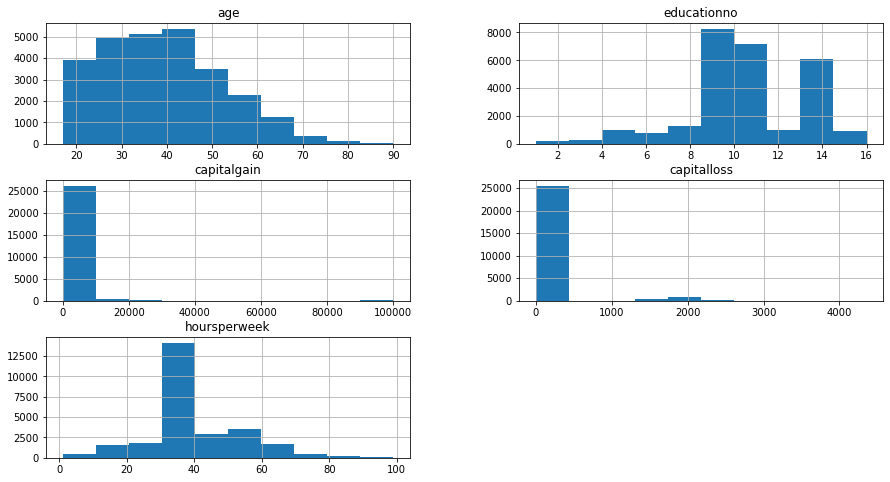

In [25]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df_train.hist(ax=ax)
plt.show()

### MODEL BUILDING

Assigning the given test and train datasets to both X and Y based on independent and dependent variables. 

In [26]:
X_train=df_train.drop(['Salary'],axis=1)
X_test=df_test.drop(['Salary'],axis=1)
Y_train=df_train['Salary']
Y_test=df_test['Salary']

One hot encoding the discrete variables. 

In [27]:
encoder = ce.OneHotEncoder(cols=['workclass','maritalstatus','occupation','relationship','race','sex','native'],use_cat_names=True)
X_train=encoder.fit_transform(X_train)
X_train.head()

,age,workclass_ State-gov,workclass_ Self-emp-not-inc,workclass_ Private,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Self-emp-inc,workclass_ Without-pay,educationno,maritalstatus_ Never-married,...,native_ Peru,native_ Outlying-US(Guam-USVI-etc),native_ Scotland,native_ Trinadad&Tobago,native_ Greece,native_ Nicaragua,native_ Vietnam,native_ Hong,native_ Ireland,native_ Hungary
0,39,1,0,0,0,0,0,0,13,1,...,0,0,0,0,0,0,0,0,0,0
1,50,0,1,0,0,0,0,0,13,0,...,0,0,0,0,0,0,0,0,0,0
2,38,0,0,1,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0
3,53,0,0,1,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,1,0,0,0,0,13,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X_test=encoder.fit_transform(X_test)
X_test.head()

,age,workclass_ Private,workclass_ Local-gov,workclass_ Self-emp-not-inc,workclass_ Federal-gov,workclass_ State-gov,workclass_ Self-emp-inc,workclass_ Without-pay,educationno,maritalstatus_ Never-married,...,native_ Scotland,native_ Jamaica,native_ Ecuador,native_ Yugoslavia,native_ Hungary,native_ Hong,native_ Greece,native_ Trinadad&Tobago,native_ Outlying-US(Guam-USVI-etc),native_ France
0,25,1,0,0,0,0,0,0,7,1,...,0,0,0,0,0,0,0,0,0,0
1,38,1,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0
2,28,0,1,0,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
3,44,1,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0
4,34,1,0,0,0,0,0,0,6,1,...,0,0,0,0,0,0,0,0,0,0


Assigning all the column names to cols.

In [29]:
cols=X_train.columns
cols

Index(['age', 'workclass_ State-gov', 'workclass_ Self-emp-not-inc',
       'workclass_ Private', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Self-emp-inc', 'workclass_ Without-pay', 'educationno',
       'maritalstatus_ Never-married', 'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Divorced', 'maritalstatus_ Married-spouse-absent',
       'maritalstatus_ Separated', 'maritalstatus_ Married-AF-spouse',
       'maritalstatus_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Exec-managerial', 'occupation_ Handlers-cleaners',
       'occupation_ Prof-specialty', 'occupation_ Other-service',
       'occupation_ Sales', 'occupation_ Transport-moving',
       'occupation_ Farming-fishing', 'occupation_ Machine-op-inspct',
       'occupation_ Tech-support', 'occupation_ Craft-repair',
       'occupation_ Protective-serv', 'occupation_ Armed-Forces',
       'occupation_ Priv-house-serv', 'relationship_ Not-in-family',
       'relationship_ Husband

Scaling the data using robust scaler. 

In [30]:
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

Storing the scaled data back into a dataframe

In [31]:
X_train=pd.DataFrame(X_train,columns=[cols])
X_train.head()

,age,workclass_ State-gov,workclass_ Self-emp-not-inc,workclass_ Private,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Self-emp-inc,workclass_ Without-pay,educationno,maritalstatus_ Never-married,...,native_ Peru,native_ Outlying-US(Guam-USVI-etc),native_ Scotland,native_ Trinadad&Tobago,native_ Greece,native_ Nicaragua,native_ Vietnam,native_ Hong,native_ Ireland,native_ Hungary
0,0.052632,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.75,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.631579,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.789474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X_test=pd.DataFrame(X_test,columns=[cols])
X_test.head()

,age,workclass_ State-gov,workclass_ Self-emp-not-inc,workclass_ Private,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Self-emp-inc,workclass_ Without-pay,educationno,maritalstatus_ Never-married,...,native_ Peru,native_ Outlying-US(Guam-USVI-etc),native_ Scotland,native_ Trinadad&Tobago,native_ Greece,native_ Nicaragua,native_ Vietnam,native_ Hong,native_ Ireland,native_ Hungary
0,-0.684211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.75,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.526316,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.210526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Preparing Gaussian Naive Bayes Model on train data.

In [33]:
gnb=GaussianNB()
gnb.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GaussianNB()

Evaluating Test Data

In [34]:
Y_pred = gnb.predict(X_test)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of Test data

In [35]:
accuracy_score(Y_pred,Y_test)

0.7467091295116772

In [36]:
pd.crosstab(Y_pred,Y_test,rownames = ['Predictions'], colnames= ['Actuals'])

Actuals,<=50K,>50K
Predictions,,
<=50K,8139,1098
>50K,2481,2412


Evaluating Train data

In [37]:
Y_train_pred=gnb.predict(X_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of Train data

In [38]:
accuracy_score(Y_train_pred,Y_train)

0.7874214771586812

In [39]:
pd.crosstab(Y_train_pred,Y_train,rownames = ['Predictions'], colnames= ['Actuals'])

Actuals,<=50K,>50K
Predictions,,
<=50K,15576,1272
>50K,4447,5608


###  CONCLUSION

This model is not good as the accuracies are not high, but they are not overfitting . So the best option is to try another model and compare the accuracies.This analyis will help to predict the salary group of people based on the various factors mentioned in the dataset.  